In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
base_url = "https://raw.githubusercontent.com/pranta-iitp/Real-Estate-Property-Price-Prediction-Project/main/gurgaon_properties_cleaned_v2.csv"
df = pd.read_csv(base_url)

In [4]:
df.sample(3)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
1359,flat,emaar mgf emerald floors premier,sector 65,2.30,13939.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,4,3,3.0,south-west,Relatively New,NaN,NaN,1650.0,1,0,1,1,1,2,197
3542,house,ansal florence super,sector 57,3.75,23148.0,1620.0,Plot area 180(150.5 sq.m.)Carpet area: 300 sq....,3,4,3,2.0,not available,Moderately Old,NaN,NaN,300.0,1,0,1,0,1,1,30
3589,house,independent,sector 45,10.00,30864.0,3240.0,Plot area 360(301.01 sq.m.),6,6,3+,4.0,north-east,Moderately Old,NaN,3240.0,NaN,1,0,1,1,1,1,70


In [5]:
df.shape

(3844, 23)

In [6]:
df.duplicated().sum()

np.int64(128)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(3716, 23)

#### 1.property_type

Property Type Distribution:
               count  percentage
property_type                   
flat            2826    0.760495
house            890    0.239505


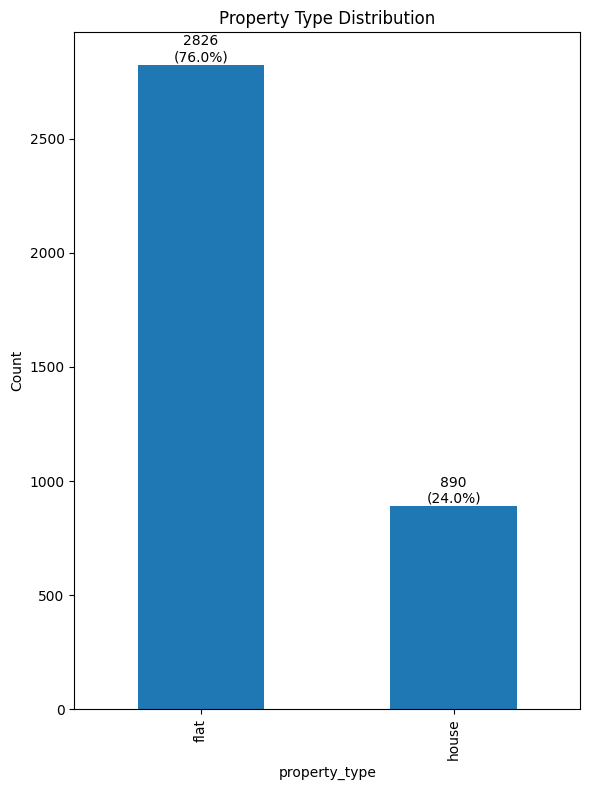

In [9]:
# Create a combined view
counts = df['property_type'].value_counts()
percentages = df['property_type'].value_counts(normalize=True)
combined = pd.concat([counts, percentages], axis=1, keys=['count', 'percentage'])

print("Property Type Distribution:")
print(combined)

# Plot with both counts and percentages displayed
ax = counts.plot(kind='bar', figsize=(6, 8))
plt.title('Property Type Distribution')
plt.ylabel('Count')

# Add labels showing both count and percentage
for i, (count, pct) in enumerate(zip(counts.values, percentages.values)):
    ax.text(i, count + 0.5, f'{count}\n({pct:.1%})', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [10]:
df['property_type'].isnull().sum()

np.int64(0)

Observations
* Highly skewed distribution
* Flats are in majority(75 percent) and there are less number of houses(~25 percent)
* No missing values

#### 2.society

In [11]:
df['society'].value_counts().shape

(685,)

In [18]:
df['society'].value_counts().shape

(685,)

In [12]:
df['society'].value_counts().head(5)

,count
society,
independent,514
tulip violet,75
ss the leaf,73
dlf new town heights,42
shapoorji pallonji joyville gurugram,42


In [13]:
df[df['society'] == 'independent']['society'].value_counts()

,count
society,
independent,514


In [16]:
df['society'].value_counts(normalize=True).head(1)

,proportion
society,
independent,0.138358


In [17]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023430
ss the leaf,0.046236
dlf new town heights,0.059356
shapoorji pallonji joyville gurugram,0.072477
signature global park,0.083411
shree vardhman victoria,0.094033
smart world orchard,0.104030
emaar mgf emerald floors premier,0.114027
paras dews,0.123711


#### There are 675 Unique values in the column 'society'. Out of which 'independent' is 13.8% and Next 75 unique values Make 50%

In [ ]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(275),
 'Very Low (1)': np.int64(315)}

Top 18 Society Distribution:
                                      count  percentage
society                                                
independent                             514   13.835801
tulip violet                             75    2.018843
ss the leaf                              73    1.965007
dlf new town heights                     42    1.130552
shapoorji pallonji joyville gurugram     42    1.130552
signature global park                    35    0.942127
shree vardhman victoria                  34    0.915209
smart world orchard                      32    0.861373
emaar mgf emerald floors premier         32    0.861373
paras dews                               31    0.834455
dlf the ultima                           31    0.834455
m3m woodshire                            30    0.807537
dlf regal gardens                        30    0.807537
shree vardhman flora                     29    0.780619
smart world gems                         28    0.753701
la vida by tata hou

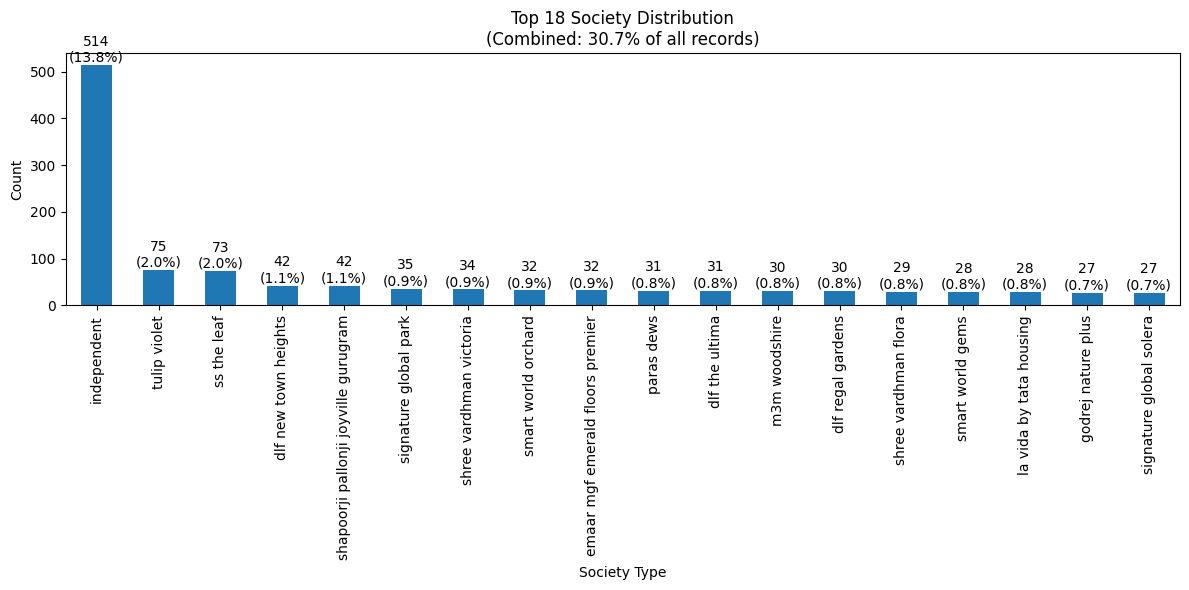

In [34]:
# Get top 15 societies
num_society=18
top_counts = df['society'].value_counts().head(num_society)
top_percentages = df['society'].value_counts(normalize=True).head(num_society)

# Calculate combined percentage of top 15 societies
total_top_count = int(top_counts.sum())
total_records = len(df)
combined_percentage = (total_top_count / total_records) * 100

# Create combined DataFrame
combined = pd.concat([top_counts, top_percentages * 100], axis=1, keys=['count', 'percentage'])

print(f"Top {num_society} Society Distribution:")
print(combined)
print(f"\nSummary:")
print(f"Total records: {total_records}")
print(f"Top {num_society} societies combined count: {total_top_count}")
print(f"Top {num_society} societies represent: {combined_percentage:.2f}% of all records")
print(f"Remaining societies represent: {100 - combined_percentage:.2f}% of all records")

# Plotting
ax = top_counts.plot(kind='bar', figsize=(12, 6))
plt.title(f'Top {num_society} Society Distribution\n(Combined: {combined_percentage:.1f}% of all records)')
plt.ylabel('Count')
plt.xlabel('Society Type')

# Add labels showing both count and percentage
for i, (count, pct) in enumerate(zip(top_counts.values, top_percentages.values)):
    ax.text(i, count + 0.5, f'{count}\n({pct:.1%})', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [35]:
df['society'].isnull().sum()

np.int64(1)

In [36]:
df[df['society'].isnull()]

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
2721,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,not available,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


### Observations
* Around 13% properties comes under independent tag.
* There are 685 societies.
* Top 18 societies(including *independent*) represent: 30.68% of all records
* The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
 * Very High (>100): Only 1 society has more than 100 listings.
 * High (50-100): 2 societies have between 50 to 100 listings.
 * Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
 * Low (2-9): 273 societies have between 2 to 9 listings.
 * Very Low (1): A significant number, 308 societies, have only 1 listing.
* 1 missing value

#### 3.Sector

In [38]:
df['sector'].value_counts().shape

(109,)

Top 10 Sectors Distribution:
            count  percentage
sector                       
sector 33     224    6.027987
sector 102    110    2.960172
sector 85     108    2.906351
sector 92     102    2.744887
sector 69      93    2.502691
sector 90      89    2.395048
sector 109     87    2.341227
sector 81      87    2.341227
sector 65      87    2.341227
sector 79      76    2.045210

Summary:
Total records: 3716
Top 10 societies combined count: 1063
Top 10 societies represent: 28.61% of all records
Remaining societies represent: 71.39% of all records


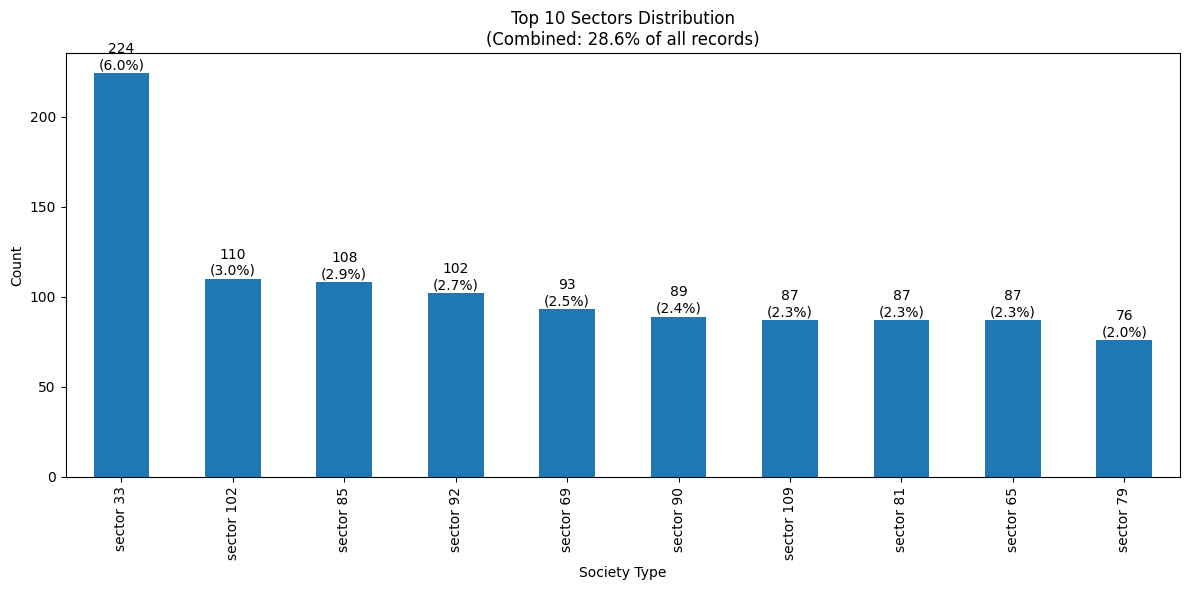

In [41]:
# Get top 15 societies
num_society=10
top_counts = df['sector'].value_counts().head(num_society)
top_percentages = df['sector'].value_counts(normalize=True).head(num_society)

# Calculate combined percentage of top 15 societies
total_top_count = int(top_counts.sum())
total_records = len(df)
combined_percentage = (total_top_count / total_records) * 100

# Create combined DataFrame
combined = pd.concat([top_counts, top_percentages * 100], axis=1, keys=['count', 'percentage'])

print(f"Top {num_society} Sectors Distribution:")
print(combined)
print(f"\nSummary:")
print(f"Total records: {total_records}")
print(f"Top {num_society} societies combined count: {total_top_count}")
print(f"Top {num_society} societies represent: {combined_percentage:.2f}% of all records")
print(f"Remaining societies represent: {100 - combined_percentage:.2f}% of all records")

# Plotting
ax = top_counts.plot(kind='bar', figsize=(12, 6))
plt.title(f'Top {num_society} Sectors Distribution\n(Combined: {combined_percentage:.1f}% of all records)')
plt.ylabel('Count')
plt.xlabel('Society Type')

# Add labels showing both count and percentage
for i, (count, pct) in enumerate(zip(top_counts.values, top_percentages.values)):
    ax.text(i, count + 0.5, f'{count}\n({pct:.1%})', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [42]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(4),
 'High (50-100)': np.int64(24),
 'Average (10-49)': np.int64(63),
 'Low (2-9)': np.int64(17),
 'Very Low (1)': np.int64(1)}

#### Observations
* There are a total of 109 unique sectors in the dataset.
* Frequency distribution of sectors:
 * Very High (>100): 4 sectors have more than 100 listings.
 * High (50-100): 24 sectors have between 50 to 100 listings.
 * Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
 * Low (2-9): 17 sectors have between 2 to 9 listings.
 * Very Low (1): Interestingly, there are no sectors with only 1 listing.

#### 4.price(output column)

In [43]:
df['price'].isnull().sum()

np.int64(17)

In [47]:
df['price'].describe().transpose()

,price
count,3699.000000
mean,2.523298
std,2.969554
min,0.070000
25%,0.950000
50%,1.510000
75%,2.750000
max,31.500000


#### Obsercations(Descriptive Statistics)
* Count: There are 3,699 non-missing price entries.
* Mean Price: The average price is approximately 2.52 crores.
* Median Price: The median (or 50th percentile) price is 1.51 crores.
* Standard Deviation: The prices have a standard deviation of 2.96, indicating variability in the prices.
* Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.

/tmp/ipython-input-61-2991178108.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{tick:.1f}Cr' for tick in current_ticks])


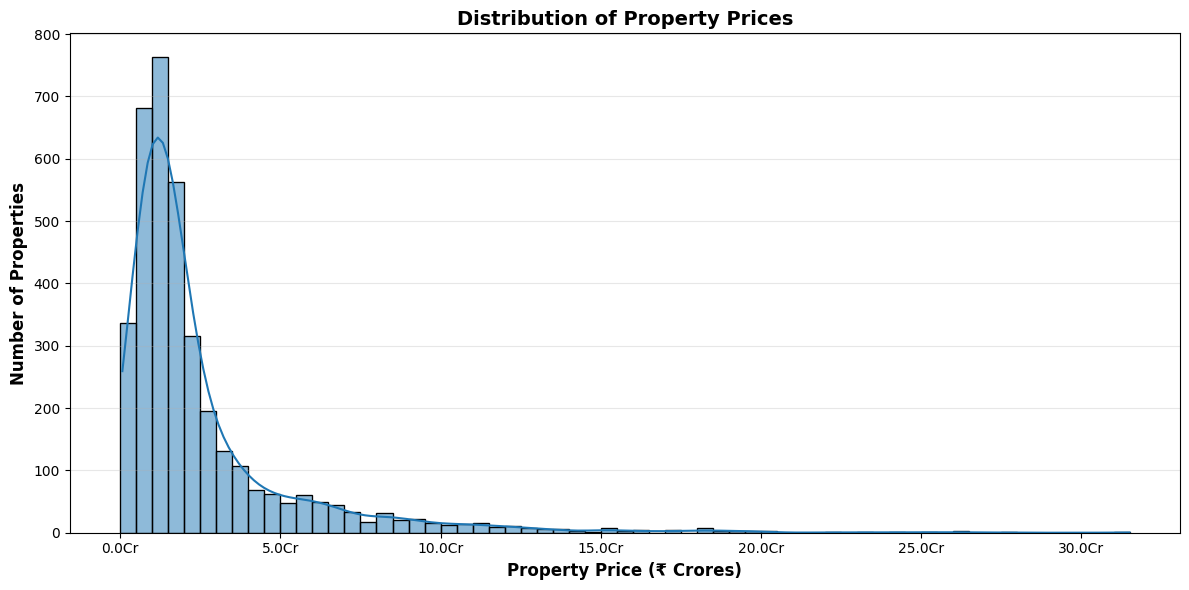

In [61]:
custom_bins = np.arange(0, 32, 0.5)

plt.figure(figsize=(12, 6))
ax = sns.histplot(df['price'], kde=True, bins=custom_bins)

# Format x-axis for crores
plt.xlabel('Property Price (₹ Crores)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Properties', fontsize=12, fontweight='bold')
plt.title('Distribution of Property Prices', fontsize=14, fontweight='bold')

# Add 'Cr' suffix to x-axis labels
current_ticks = ax.get_xticks()
ax.set_xticklabels([f'{tick:.1f}Cr' for tick in current_ticks])

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


#### Observations
* Highly Right-Skewed Distribution: Price data shows a classic right-skewed (positively skewed) distribution, which is typical for real estate markets.
* This means:Most properties are concentrated in the lower price ranges
* A long tail extends toward higher prices
* The mean price is likely higher than the median price